In [1]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from zse.collections import *
from zse.utilities import *
from zse.rings import *

from matplotlib import cm
from ase.visualize import view

In [2]:
z = framework('CHI')
ts,tm,ti = get_osites('CHI')
print(ti)
c,r,ra,a = get_rings(z,52,validation='Goetze')
print(c)
view(a)

[0, 8, 16, 20, 28, 32, 36, 44, 52]
[]


In [3]:
f = open('crum_rings.txt','r')
alllines=f.readlines()
f.close()

In [2]:
def get_fw_data(file,code):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    
    for i,line in enumerate(data):
        fields = line.split()
        if fields[0] == code:
            start = i
            break
    
    # go through fw chunk and get data
    
    t_sites = {}
    o_sites = {}
    for i,line in enumerate(data[start+1:]):
        line = line.rstrip(' \n')
        
        # check if the rings exist
        
#         if 'FAILED' in line or 'LARGE' in line:
#             return(False,False)
#         fields = line.split()
        
        # get the t site rings
        
        if 'T' in line and ':' in line:
            fields = line.split(':')
            t_sites[fields[0]]=fields[1]
#         for x in t_sites:
#             r = t_sites[x].split('_')
#             if len(r)>20:
#                 return(False,False)
                
        
        # get the o site rings
        if 'O' in line and ':' in line:
            fields = line.split(':')
            o_sites[fields[0]]=fields[1]
#         for x in o_sites:
#             r = o_sites[x]
#             if len(r)>20:
#                 return(False,False)
        
        
        
        fields = line.split()
        if fields[0] == 'Framework':
            end = i+start-1
            break

    return(t_sites,o_sites)

In [3]:
file = 'goetzke_rings.txt'
fws = get_all_fws()
g_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            g_counts[x]+=1
print(g_counts)

[  0.   0.   0.  24. 237. 121. 229.   7. 193.  12. 141.   3. 145.   1.
  59.   2.  16.   0.  21.]


In [20]:
file = 'crum_rings.txt'
fws = get_all_fws()
c_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            c_counts[x]+=1
print(c_counts)

[  0.   0.   0.  24. 237. 121. 224.   7. 154.  12.  85.   3. 109.   1.
  15.   2.   4.   0.   7.]


In [4]:
iza = pd.read_csv('iza_data.csv')
print(iza.loc[iza.Framework=='AFI'])
fws = iza['Framework'].values
rings = iza['Rings'].values
i_counts = np.zeros(19)
for r in rings:
    frings = []
    if type(r) == str:
        r = r.split('_')
        frings += [int(x) for x in r]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            i_counts[x]+=1
    print(frings)
print(i_counts)

   Unnamed: 0 Framework   a (Å)       b     c  alpha  beta  gamma  \
7           8       AFI  13.827  13.827  8.58   90.0  90.0  120.0   

   Volume (Å^3)  Density (T sites/ 1000 Å^3)   Rings  Max Diameter (Å)  \
7        1420.6                         16.9  12_6_4               8.3   

   Max diameter along a  Max diameter along b  Max diameter along c  \
7                  2.22                  2.22                  7.42   

   Accessible Volume %  Number of T Sites  
7                14.07                  1  
[4 6 8]
[4 8]
[4 6 8]
[ 4  6 10]
[4 6 8]
[ 4  6 14]
[4 6]
[ 4  6 12]
[4 6 8]
[ 4  6 10]
[ 4  6  8 12]
[ 4  6  8 12]
[4 6 8]
[4 6 8]
[4 6 8]
[ 4  8 12]
[ 4  6 10]
[4 6 8]
[4 6 8]
[4 6 8]
[4 6]
[ 4  6 12]
[4 6 8]
[ 4  6 12]
[ 4  6 12]
[4 6 8]
[4 6 8]
[4 6 8]
[4 6 8]
[4 6 8]
[4 6 8]
[4 6 8]
[ 4  5  6 12]
[ 4  5  6 12]
[5 6 8]
[ 4  5  6 10]
[ 4  5  6 10 12]
[ 3  4  6  8 10]
[ 4  6  8 12]
[4 5 6 8]
[ 4  6 12]
[ 4  6 12]
[5 6 8]
[5 8]
[ 4  5  6 14]
[ 4  6  8 10]
[ 4  6  8 10]
[4 6 8

In [22]:
# count using vertex symbol rings
file = 'vertex_rings.txt'
fws = get_all_fws()
v_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            v_counts[x]+=1
print(v_counts)

[  0.   0.   0.  24. 237. 121. 219.   7. 148.  10.  75.   3.  73.   0.
  10.   1.   4.   0.   1.]


In [23]:
# count using Sastre rings
file = 'sastre_rings.txt'
fws = get_all_fws()
s_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            s_counts[x]+=1
print(s_counts)

[  0.   0.   0.  24. 237. 121. 219.   7. 148.  10.  75.   3.  73.   0.
  10.   1.   4.   0.   1.]


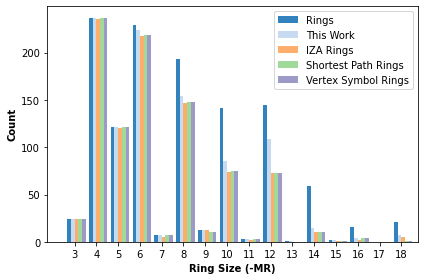

In [26]:
viridis = cm.get_cmap('tab20c',7)

ring_sizes = np.arange(19)
width = 0.17
plt.bar(ring_sizes,g_counts,width,label='Rings',color = viridis.colors[0])
plt.bar(ring_sizes+width,c_counts,width,label='This Work',color = viridis.colors[1])
plt.bar(ring_sizes+2*width, i_counts,width,label='IZA Rings',color = viridis.colors[2])
plt.bar(ring_sizes+3*width, s_counts,width,label='Shortest Path Rings',color=viridis.colors[3])
plt.bar(ring_sizes+4*width, v_counts,width,label='Vertex Symbol Rings',color=viridis.colors[4])

plt.xlim([2,19])
plt.xticks(np.arange(3,19)+3*width/2,np.arange(3,19))
#plt.yticks([])
plt.ylabel('Count',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/ring-counts_2.pdf',dpi=300)
plt.show()

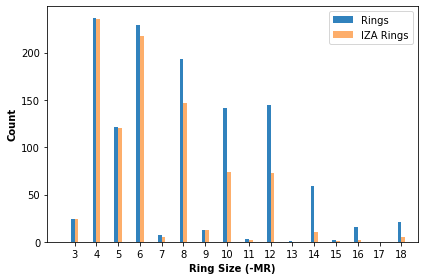

In [8]:
viridis = cm.get_cmap('tab20c',7)

ring_sizes = np.arange(19)
width = 0.17
plt.bar(ring_sizes+width,g_counts,width,label='Rings',color = viridis.colors[0])
plt.bar(ring_sizes+2*width, i_counts,width,label='IZA Rings',color = viridis.colors[2])
plt.xlim([2,19])
plt.xticks(np.arange(3,19)+3*width/2,np.arange(3,19))
#plt.yticks([])
plt.ylabel('Count',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/rings_vs_iza_rings.pdf',dpi=300)
plt.show()

In [17]:
i = 1
print(len(fws))
for f in sorted(fws):
    r = get_ring_sizes(f)
    print(i,f,r)
    i+=1

253
1 ABW [8 6 4]
2 ACO [8 4]
3 AEI [8 6 4]
4 AEL [10  6  4]
5 AEN [8 6 4]
6 AET [14  6  4]
7 AFG [6 4]
8 AFI [12  6  4]
9 AFN [8 6 4]
10 AFO [10  6  4]
11 AFR [12  8  6  4]
12 AFS [12  8  6  4]
13 AFT [8 6 4]
14 AFV [8 6 4]
15 AFX [8 6 4]
16 AFY [12  8  4]
17 AHT [10  6  4]
18 ANA [8 6 4]
19 APC [8 6 4]
20 APD [8 6 4]
21 AST [6 4]
22 ASV [12  6  4]
23 ATN [8 6 4]
24 ATO [12  6  4]
25 ATS [12  6  4]
26 ATT [8 6 4]
27 ATV [8 6 4]
28 AVE [8 6 4]
29 AVL [8 6 4]
30 AWO [8 6 4]
31 AWW [8 6 4]
32 BCT [8 6 4]
33 BEA [12  6  5  4]
34 BEC [12  6  5  4]
35 BIK [8 6 5]
36 BOF [10  6  5  4]
37 BOG [12 10  6  5  4]
38 BOZ [10  8  6  4  3]
39 BPH [12  8  6  4]
40 BRE [8 6 5 4]
41 BSV [12  6  4]
42 CAN [12  6  4]
43 CAS [8 6 5]
44 CDO [8 5]
45 CFI [14  6  5  4]
46 CGF [10  8  6  4]
47 CGS [10  8  6  4]
48 CHA [8 6 4]
49 CHI [9 6 5 4]
50 CLO [20  8  6  4]
51 CON [12 10  6  5  4]
52 CSV [10  8  6  5  4]
53 CTH [14 10  6  5  4]
54 CZP [12  8  4]
55 DAC [10  8  5  4]
56 DDR [8 6 5 4]
57 DFO [12 10  8  6 

# Frequency Plot for T-sites

In [3]:
file = 'goetzke_rings.txt'
fws = get_all_fws()
fw5 = []
g_counts = np.zeros(19)
tsn = 0
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        tsn+=1
        trings = tsites[t].split('_')
        frings = [int(x) for x in trings]
        frings = np.unique(frings)
        for x in frings:
            if x <=18:
                g_counts[x]+=1
        if 5 in frings:
            fw5.append('{0}-{1}'.format(f,t))
print(g_counts)
print(tsn)

[   0.    0.    0.   58.  934.  991. 1175.   35.  781.   52.  776.   20.
  789.   10.  312.    7.   67.    0.   57.]
1460


In [4]:
file = 'crum_rings.txt'
fws = get_all_fws()
c_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        trings = tsites[t].split('_')
        frings = [int(x) for x in trings]
        frings = np.unique(frings)
        for x in frings:
            if x <=18:
                c_counts[x]+=1
print(c_counts)

[   0.    0.    0.   58.  934.  991. 1138.   35.  529.   52.  577.   20.
  538.   10.   97.    7.   16.    0.   34.]


In [5]:
file = 'sastre_rings.txt'
fws = get_all_fws()
s_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        trings = tsites[t].split('_')
        frings = [int(x) for x in trings]
        frings = np.unique(frings)
        for x in frings:
            if x <=18:
                s_counts[x]+=1
print(s_counts)

[   0.    0.    0.   58.  934.  991. 1114.   35.  517.   48.  553.   20.
  390.    0.   68.    3.   20.    0.   18.]


In [6]:
file = 'vertex_rings.txt'
fws = get_all_fws()
vfw5 = []
v_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        trings = tsites[t].split('_')
        frings = [int(x) for x in trings]
        frings = np.unique(frings)
        for x in frings:
            if x <=18:
                v_counts[x]+=1
        if 5 in frings:
            vfw5.append('{0}-{1}'.format(f,t))
print(v_counts)

[   0.    0.    0.   58.  934.  980. 1059.   26.  455.   38.  375.    8.
  158.    0.   30.    2.    5.    0.    8.]


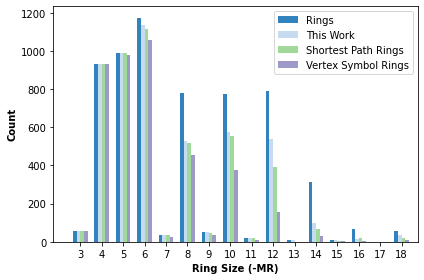

In [16]:
viridis = cm.get_cmap('tab20c',7)

ring_sizes = np.arange(19)
width = 0.17
plt.bar(ring_sizes,g_counts,width,label='Rings',color = viridis.colors[0])
plt.bar(ring_sizes+width,c_counts,width,label='This Work',color = viridis.colors[1])
plt.bar(ring_sizes+2*width, s_counts,width,label='Shortest Path Rings',color=viridis.colors[3])
plt.bar(ring_sizes+3*width, v_counts,width,label='Vertex Symbol Rings',color=viridis.colors[4])

plt.xlim([2,19])
plt.xticks(np.arange(3,19)+3*width/2,np.arange(3,19))
#plt.yticks([])
plt.ylabel('Count',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/tsite-ring-counts.pdf',dpi=300)
plt.show()

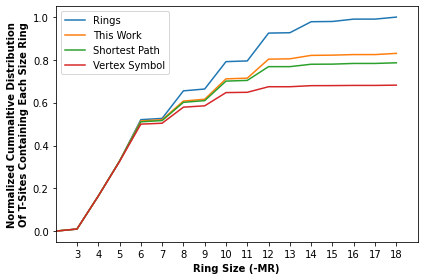

In [41]:

def ecdf(vals):
    result = [vals[0]]
    for i,v in enumerate(vals[:-1]):
        result.append(result[-1]+vals[i+1])
    result = np.array(result)
    return result
r = ecdf(g_counts)
n = r[-1]


ring_sizes = np.arange(19)
plt.plot(ring_sizes,ecdf(g_counts)/n,label='Rings')
plt.plot(ring_sizes,ecdf(c_counts)/n,label='This Work')
plt.plot(ring_sizes,ecdf(s_counts)/n,label='Shortest Path')
plt.plot(ring_sizes,ecdf(v_counts)/n,label='Vertex Symbol')


plt.xlim([2,19])
plt.xticks(np.arange(3,19),np.arange(3,19))
#plt.yticks([])
plt.ylabel('Normalized Cummaltive Distribution\nOf T-Sites Containing Each Size Ring',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/tsite-ecdf.pdf',dpi=300)
plt.show()

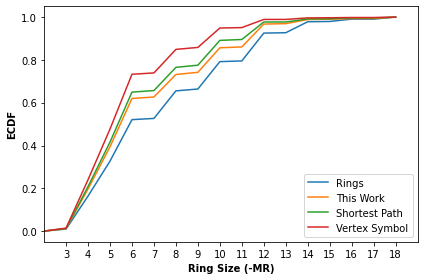

In [34]:

def ecdf(vals):
    result = [vals[0]]
    for i,v in enumerate(vals[:-1]):
        result.append(result[-1]+vals[i+1])
    result = np.array(result)/result[-1]
    return result
r = ecdf(g_counts)
n = 1460


ring_sizes = np.arange(19)
plt.plot(ring_sizes,ecdf(g_counts),label='Rings')
plt.plot(ring_sizes,ecdf(c_counts),label='This Work')
plt.plot(ring_sizes,ecdf(s_counts),label='Shortest Path')
plt.plot(ring_sizes,ecdf(v_counts),label='Vertex Symbol')

plt.xlim([2,19])
plt.xticks(np.arange(3,19),np.arange(3,19))
#plt.yticks([])
plt.ylabel('ECDF',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
#plt.savefig('../figures/completed-figures/tsite-ring-counts.pdf',dpi=300)
plt.show()

In [7]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

print(Diff(fw5,vfw5))


['VNI-T5', 'SVY-T19', 'SVY-T24', 'RSN-T3', 'VSV-T1', 'SVY-T17', 'SVY-T22', 'MWW-T6', 'SVY-T23', 'SVY-T25', 'MWW-T7']


# Frequency Plot for O-sites

In [39]:
file = 'goetzke_rings.txt'
fws = get_all_fws()
g_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in osites:
        trings = osites[t].split('_')
        try:
            frings = [int(x) for x in trings]
            frings = np.unique(frings)
            for x in frings:
                if x <=18:
                    g_counts[x]+=1
        except:
            pass
print(g_counts)

[   0.    0.    0.   75. 1658. 1571. 2055.   39. 1444.   65. 1173.   25.
 1233.   12.  474.    8.  105.    0.   93.]


In [30]:
file = 'crum_rings.txt'
fws = get_all_fws()
c_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in osites:
        trings = osites[t].split('_')
        try:
            frings = [int(x) for x in trings]
            frings = np.unique(frings)
            for x in frings:
                if x <=18:
                    c_counts[x]+=1
        except:
            pass
print(c_counts)

[   0.    0.    0.   75. 1658. 1571. 1902.   39.  951.   65.  781.   25.
  755.   12.  145.    8.   25.    0.   41.]


In [29]:
file = 'sastre_rings.txt'
fws = get_all_fws()
s_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in osites:
        trings = osites[t].split('_')
        try:
            frings = [int(x) for x in trings]
            frings = np.unique(frings)
            for x in frings:
                if x <=18:
                    s_counts[x]+=1
        except:
            pass
print(s_counts)

[   0.    0.    0.   75. 1658. 1571. 1865.   39.  918.   60.  739.   25.
  523.    0.   72.    3.   26.    0.   22.]


In [33]:
file = 'vertex_rings.txt'
fws = get_all_fws()
v_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in osites:
        trings = osites[t].split('_')
        try:
            frings = [int(x) for x in trings]
            frings = np.unique(frings)
            for x in frings:
                if x <=18:
                    v_counts[x]+=1
        except:
            pass
print(v_counts)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


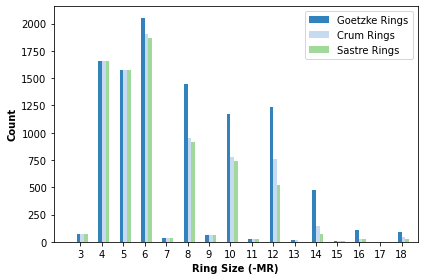

In [40]:
viridis = cm.get_cmap('tab20c',7)

ring_sizes = np.arange(19)
width = 0.17
plt.bar(ring_sizes+width,g_counts,width,label='Goetzke Rings',color = viridis.colors[0])
plt.bar(ring_sizes+2*width,c_counts,width,label='Crum Rings',color = viridis.colors[1])
plt.bar(ring_sizes+3*width, s_counts,width,label='Sastre Rings',color=viridis.colors[3])

plt.xlim([2,19])
plt.xticks(np.arange(3,19)+3*width/2,np.arange(3,19))
#plt.yticks([])
plt.ylabel('Count',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/osite-ring-counts.pdf',dpi=300)
plt.show()

# Number of T and O sites through all the frameworks

In [113]:
iza = pd.read_csv('iza_data.csv')
fws = iza['Framework'].values
iza.set_index('Framework',inplace=True)
file = 'goetzke_rings.txt'
fws = get_all_fws()
t_count = 0
o_count = 0
for f in sorted(fws):
    count = 0
    count2 = 0
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        t_count += 1
    for o in osites:
        o_count += 1
print('# of T-Sites',t_count)
print('# of O-sites',o_count)

# of T-Sites 1460
# of O-sites 3219


In [34]:
# of unique Goetzke T-Sites
file = 'goetzke_rings.txt'
fws = get_all_fws()
t_ring_list = []
o_ring_list = []
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        temp = tsites[t]
        temp = temp.split('_')
        temp = [int(n) for n in temp if n !='20']
        t_ring_list.append(temp) 
    for o in osites:
        temp = osites[o]
        temp = temp.split('_')
        try:
            temp = [int(n) for n in temp if n !='20'] 
            o_ring_list.append(temp)
        except:
            pass


In [35]:
ut = np.unique(t_ring_list)
print(len(ut))
uo = np.unique(o_ring_list)
print(len(uo))

990
1278


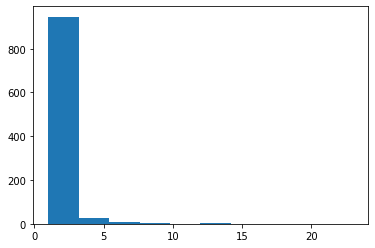

In [36]:
t_list = []
for t in t_ring_list:
    temp = [str(x) for x in t]
    temp = '_'.join(temp)
    t_list.append(temp)

from collections import Counter
counts = sorted(Counter(t_list).items(),key = lambda item:(-item[1],item[0]))
just_counts = []
for c in counts:
    just_counts.append(c[1])
plt.hist(just_counts)
plt.show()

In [32]:
# of unique Sastre T-Sites
file = 'sastre_rings.txt'
fws = get_all_fws()
t_ring_list = []
o_ring_list = []
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        temp = tsites[t]
        temp = temp.split('_')
        temp = [int(n) for n in temp if n !='20']
        t_ring_list.append(temp) 
    for o in osites:
        temp = osites[o]
        temp = temp.split('_')
        try:
            temp = [int(n) for n in temp if n !='20'] 
            o_ring_list.append(temp)
        except:
            pass



ut = np.unique(t_ring_list)
print(len(ut))
uo = np.unique(o_ring_list)
print(len(uo))

748
668


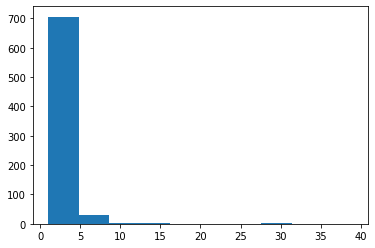

In [33]:
t_list = []
for t in t_ring_list:
    temp = [str(x) for x in t]
    temp = '_'.join(temp)
    t_list.append(temp)

from collections import Counter
counts = sorted(Counter(t_list).items(),key = lambda item:(-item[1],item[0]))
just_counts = []
for c in counts:
    just_counts.append(c[1])
plt.hist(just_counts)
plt.show()

In [17]:
# of unique Crum T-Sites
file = 'crum_rings.txt'
fws = get_all_fws()
t_ring_list = []
o_ring_list = []
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        temp = tsites[t]
        temp = temp.split('_')
        temp = [int(n) for n in temp if n !='20']
        t_ring_list.append(temp) 
    for o in osites:
        temp = osites[o]
        temp = temp.split('_')
        try:
            temp = [int(n) for n in temp if n !='20'] 
            o_ring_list.append(temp)
        except:
            pass





In [22]:
ut = np.unique(t_ring_list)
print(len(ut))
uo = np.unique(o_ring_list)
print(len(uo))

805
788


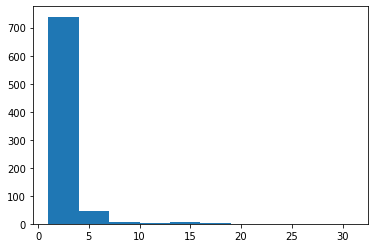

In [30]:
t_list = []
for t in t_ring_list:
    temp = [str(x) for x in t]
    temp = '_'.join(temp)
    t_list.append(temp)

from collections import Counter
counts = sorted(Counter(t_list).items(),key = lambda item:(-item[1],item[0]))
just_counts = []
for c in counts:
    just_counts.append(c[1])
plt.hist(just_counts)
plt.show()

In [37]:
# of unique vertex T-Sites
data = np.loadtxt('iza_vertex_symbols.csv',delimiter=',',dtype = str)
tsites = data[:,2]
ut = np.unique(tsites)
print(len(ut))
counts = sorted(Counter(tsites).items(),key = lambda item:(-item[1],item[0]))
for c in counts[:10]:
    print(c)


562
('4-4-6-6-6-6', 40)
('4-4-4-6-8-8', 32)
('4-4-4-6-6-8', 30)
('4-4-4-8-8-8_2', 30)
('5-5-5-5-5-6', 26)
('10_3-5-5-5-5-5_2', 21)
('10_2-5-5-5-5-5_2', 16)
('10_2-5-5-5_2-6-6_2', 16)
('4-6-6_2-6_2-6_3-6_3', 16)
('10_2-4-5-5-5-6_2', 15)


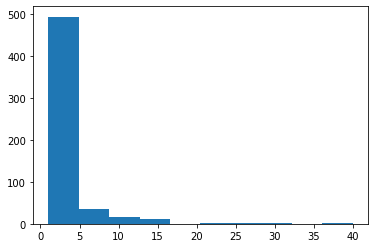

In [38]:


from collections import Counter
counts = sorted(Counter(tsites).items(),key = lambda item:(-item[1],item[0]))
just_counts = []
for c in counts:
    just_counts.append(c[1])
plt.hist(just_counts)
plt.show()

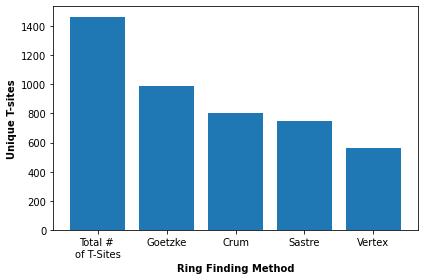

In [39]:
# Number of unique T-sites in full IZA data set
counts = [1460,990,805,748,562]
xax = [1,2,3,4,5]
plt.bar(xax,counts)
plt.xticks(np.arange(1,6),['Total # \nof T-Sites','Goetzke','Crum','Sastre','Vertex'])
plt.xlabel('Ring Finding Method',weight='bold')
plt.ylabel('Unique T-sites',weight='bold')
plt.tight_layout()
plt.savefig('../figures/completed-figures/unique-ts.pdf',dpi=300)
plt.show()

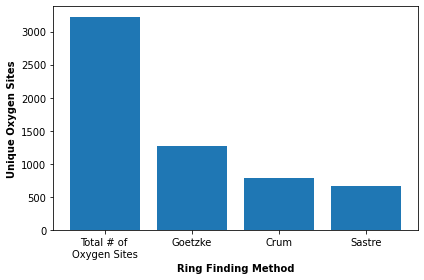

In [40]:
# Number of unique oxygen in full IZA dataset 
counts = [3219,1278,788,668]
xax = [1,2,3,4]
plt.bar(xax,counts)
plt.xticks(np.arange(1,5),['Total # of \nOxygen Sites','Goetzke','Crum','Sastre'])
plt.xlabel('Ring Finding Method',weight='bold')
plt.ylabel('Unique Oxygen Sites',weight='bold')
plt.tight_layout()
plt.savefig('../figures/completed-figures/unique-os.pdf',dpi=300)
plt.show()